In [3]:
import pandas as pd

# Load dataset
df = pd.read_csv('NVidia_stock_history.csv')


In [4]:
print(df.head())
print(df.info())


                        Date      Open      High       Low     Close  \
0  1999-01-22 00:00:00-05:00  0.040129  0.044786  0.035590  0.037621   
1  1999-01-25 00:00:00-05:00  0.040607  0.042039  0.037621  0.041562   
2  1999-01-26 00:00:00-05:00  0.042039  0.042876  0.037740  0.038337   
3  1999-01-27 00:00:00-05:00  0.038457  0.039412  0.036307  0.038218   
4  1999-01-28 00:00:00-05:00  0.038218  0.038457  0.037859  0.038098   

       Volume  Dividends  Stock Splits  
0  2714688000        0.0           0.0  
1   510480000        0.0           0.0  
2   343200000        0.0           0.0  
3   244368000        0.0           0.0  
4   227520000        0.0           0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442 entries, 0 to 6441
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          6442 non-null   object 
 1   Open          6442 non-null   float64
 2   High          6442 non-null   float64


In [5]:
# Handle missing values (e.g., forward fill)
df.fillna(method='ffill', inplace=True)

# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)


In [6]:
df['MA_10'] = df['Close'].rolling(window=10).mean()
df['MA_50'] = df['Close'].rolling(window=50).mean()


In [7]:
df

,Open,High,Low,Close,Volume,Dividends,Stock Splits,MA_10,MA_50
Date,,,,,,,,,
1999-01-22 00:00:00-05:00,0.040129,0.044786,0.035590,0.037621,2714688000,0.0,0.0,NaN,NaN
1999-01-25 00:00:00-05:00,0.040607,0.042039,0.037621,0.041562,510480000,0.0,0.0,NaN,NaN
1999-01-26 00:00:00-05:00,0.042039,0.042876,0.037740,0.038337,343200000,0.0,0.0,NaN,NaN
1999-01-27 00:00:00-05:00,0.038457,0.039412,0.036307,0.038218,244368000,0.0,0.0,NaN,NaN
1999-01-28 00:00:00-05:00,0.038218,0.038457,0.037859,0.038098,227520000,0.0,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2024-08-22 00:00:00-04:00,130.020004,130.750000,123.099998,123.739998,376189100,0.0,0.0,120.492000,120.8158
2024-08-23 00:00:00-04:00,125.860001,129.600006,125.220001,129.369995,323230300,0.0,0.0,122.953999,120.8992
2024-08-26 00:00:00-04:00,129.570007,131.259995,124.370003,126.459999,331964700,0.0,0.0,124.698000,120.8362


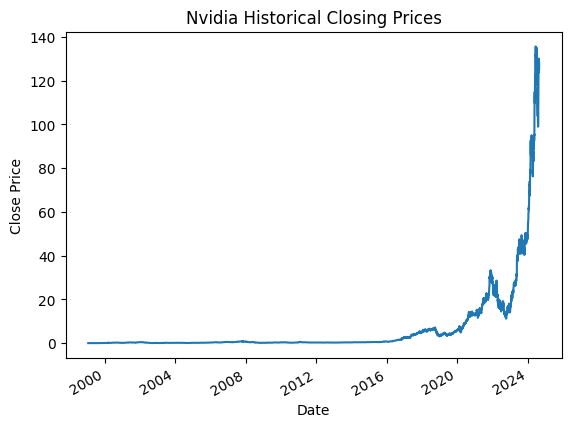

In [8]:
import matplotlib.pyplot as plt

df['Close'].plot(title='Nvidia Historical Closing Prices')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.show()


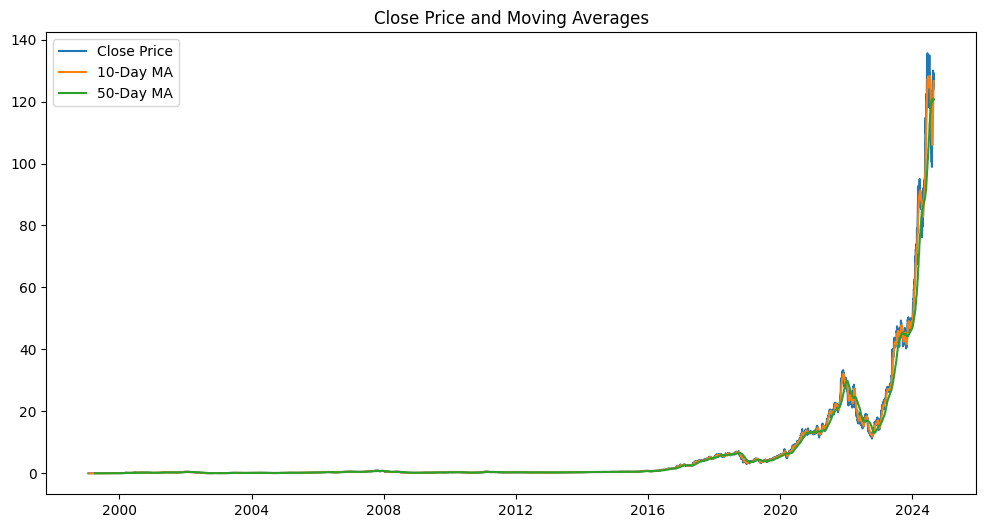

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_10'], label='10-Day MA')
plt.plot(df['MA_50'], label='50-Day MA')
plt.title('Close Price and Moving Averages')
plt.legend()
plt.show()


In [10]:
print(df.corr())

                  Open      High       Low     Close    Volume  Dividends  \
Open          1.000000  0.999863  0.999778  0.999556 -0.125072   0.061234   
High          0.999863  1.000000  0.999783  0.999776 -0.124203   0.060747   
Low           0.999778  0.999783  1.000000  0.999845 -0.126317   0.061129   
Close         0.999556  0.999776  0.999845  1.000000 -0.125347   0.060857   
Volume       -0.125072 -0.124203 -0.126317 -0.125347  1.000000  -0.037088   
Dividends     0.061234  0.060747  0.061129  0.060857 -0.037088   1.000000   
Stock Splits  0.072011  0.072218  0.071495  0.072892 -0.003049  -0.001893   
MA_10         0.998604  0.998678  0.998402  0.998364 -0.126638   0.060648   
MA_50         0.991055  0.991387  0.990687  0.990948 -0.131970   0.054751   

              Stock Splits     MA_10     MA_50  
Open              0.072011  0.998604  0.991055  
High              0.072218  0.998678  0.991387  
Low               0.071495  0.998402  0.990687  
Close             0.072892  0.998

In [11]:
from sklearn.model_selection import train_test_split

# Define features and target variable
features = ['Open', 'High', 'Low', 'Volume', 'MA_10', 'MA_50']
X = df[features]
y = df['Close']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
# Check for missing values
print(df.isna().sum())


Open             0
High             0
Low              0
Close            0
Volume           0
Dividends        0
Stock Splits     0
MA_10            9
MA_50           49
dtype: int64


In [15]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy (mean, median, or most_frequent)
imputer = SimpleImputer(strategy='mean')  # or strategy='median'

# Fit and transform the training data
X_train_imputed = imputer.fit_transform(X_train)

# Transform the test data
X_test_imputed = imputer.transform(X_test)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train_imputed, y_train)

# Predict and evaluate
predictions = model.predict(X_test_imputed)
mse = mean_squared_error(y_test, predictions)
print(f'Linear Regression MSE: {mse}')


Linear Regression MSE: 0.21193339632363306


In [17]:
# Check for missing values in training and testing data
print(X_train.isna().sum())
print(X_test.isna().sum())


Open       0
High       0
Low        0
Volume     0
MA_10      9
MA_50     49
dtype: int64
Open      0
High      0
Low       0
Volume    0
MA_10     0
MA_50     0
dtype: int64


In [18]:
from sklearn.impute import KNNImputer

# Create a KNN imputer object
knn_imputer = KNNImputer(n_neighbors=5)

# Fit and transform the training data
X_train_imputed = knn_imputer.fit_transform(X_train)
X_test_imputed = knn_imputer.transform(X_test)


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Initialize and train the Random Forest model
rf_model = RandomForestRegressor()
rf_model.fit(X_train_imputed, y_train)  # or X_train_cleaned if you chose to drop missing values

# Predict and evaluate
rf_predictions = rf_model.predict(X_test_imputed)  # or X_test_cleaned
rf_mse = mean_squared_error(y_test, rf_predictions)
print(f'Random Forest Model MSE: {rf_mse}')


Random Forest Model MSE: 1333.1935487742717


In [20]:
from sklearn.metrics import mean_squared_error

# For Linear Regression
print(f'Linear Regression MSE: {mean_squared_error(y_test, predictions)}')

# For Random Forest
print(f'Random Forest MSE: {mean_squared_error(y_test, rf_predictions)}')



Linear Regression MSE: 0.21193339632363306
Random Forest MSE: 1333.1935487742717


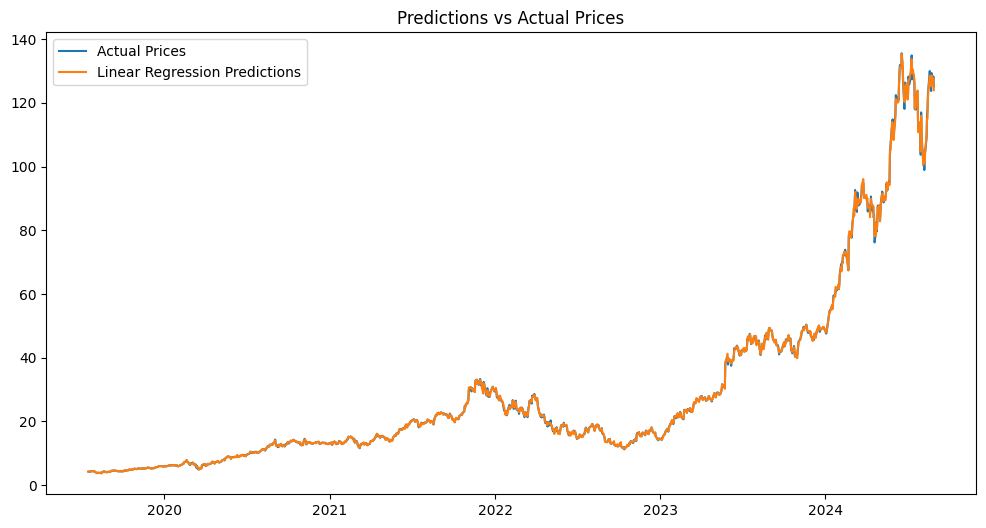

In [21]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, predictions, label='Linear Regression Predictions')
plt.title('Predictions vs Actual Prices')
plt.legend()
plt.show()


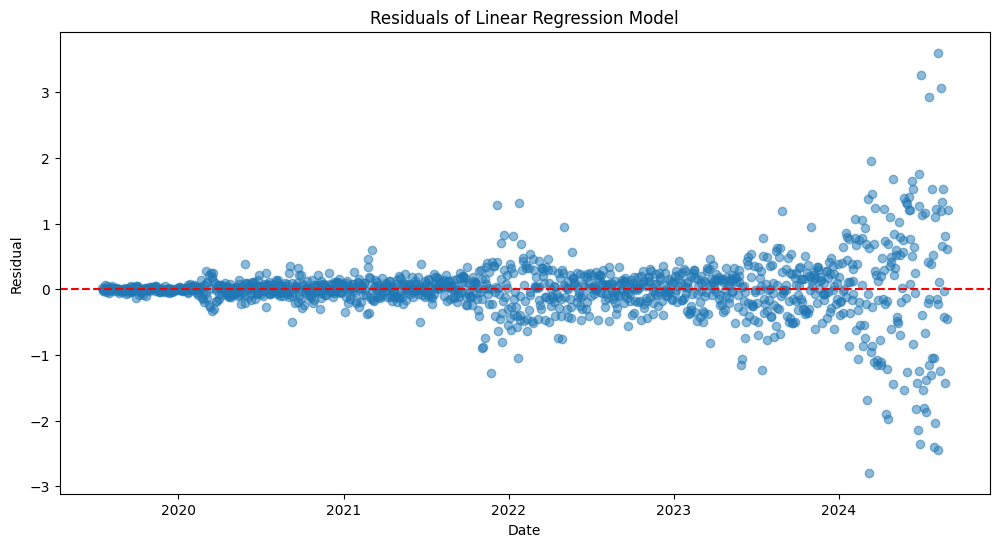

In [22]:
residuals = y_test - predictions
plt.figure(figsize=(12, 6))
plt.scatter(y_test.index, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals of Linear Regression Model')
plt.xlabel('Date')
plt.ylabel('Residual')
plt.show()


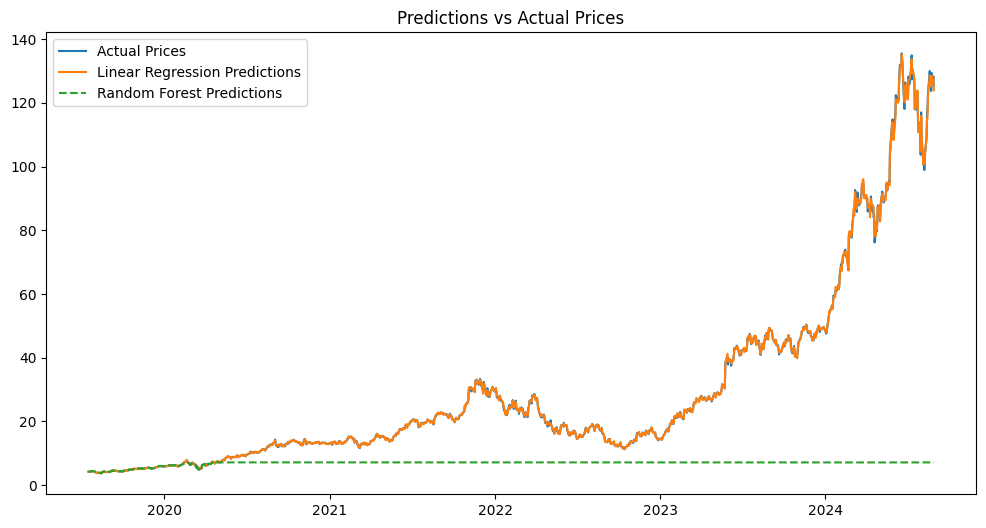

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(y_test.index, y_test, label='Actual Prices')
plt.plot(y_test.index, predictions, label='Linear Regression Predictions')
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions', linestyle='--')
plt.title('Predictions vs Actual Prices')
plt.legend()
plt.show()


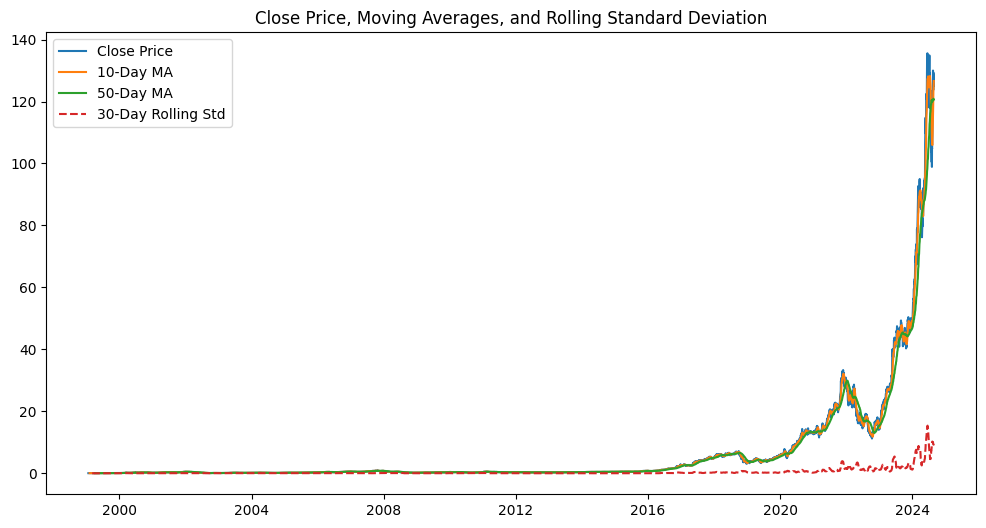

In [24]:
df['Rolling_Std'] = df['Close'].rolling(window=30).std()
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close Price')
plt.plot(df['MA_10'], label='10-Day MA')
plt.plot(df['MA_50'], label='50-Day MA')
plt.plot(df['Rolling_Std'], label='30-Day Rolling Std', linestyle='--')
plt.title('Close Price, Moving Averages, and Rolling Standard Deviation')
plt.legend()
plt.show()


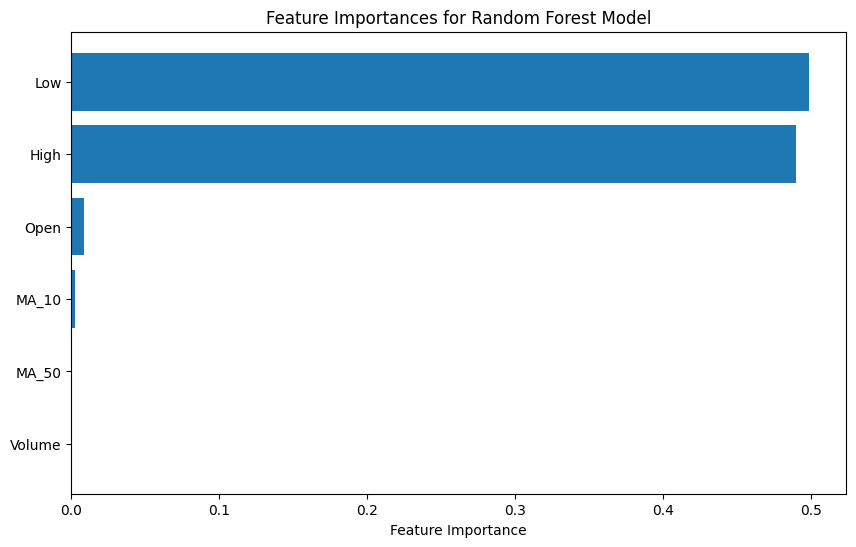

In [25]:
importances = rf_model.feature_importances_
features = X.columns
sorted_indices = importances.argsort()

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_indices], importances[sorted_indices])
plt.xlabel('Feature Importance')
plt.title('Feature Importances for Random Forest Model')
plt.show()


In [26]:
from sklearn.model_selection import cross_val_score

# Evaluate Linear Regression
lr_scores = cross_val_score(LinearRegression(), X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Linear Regression Cross-Val MSE: {-lr_scores.mean()}')

# Evaluate Random Forest
rf_scores = cross_val_score(RandomForestRegressor(), X, y, cv=5, scoring='neg_mean_squared_error')
print(f'Random Forest Cross-Val MSE: {-rf_scores.mean()}')


C:\Users\laksh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 354, in predict
    return self._decision_function(X)
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 337, in _decision_function
    X = self._validat

Linear Regression Cross-Val MSE: nan
Random Forest Cross-Val MSE: nan


C:\Users\laksh\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:794: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 115, in __call__
    score = scorer._score(cached_call, estimator, *args, **kwargs)
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\metrics\_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 981, in predict
    X = self._validate_X_predict(X)
  File "C:\Users\laksh\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 602, in _validate_X_predict
    X = self._validate_dat

In [27]:
from sklearn.metrics import mean_absolute_error, r2_score

# Linear Regression Metrics
print(f'Linear Regression MAE: {mean_absolute_error(y_test, predictions)}')
print(f'Linear Regression RMSE: {mean_squared_error(y_test, predictions, squared=False)}')
print(f'Linear Regression R^2: {r2_score(y_test, predictions)}')

# Random Forest Metrics
print(f'Random Forest MAE: {mean_absolute_error(y_test, rf_predictions)}')
print(f'Random Forest RMSE: {mean_squared_error(y_test, rf_predictions, squared=False)}')
print(f'Random Forest R^2: {r2_score(y_test, rf_predictions)}')


Linear Regression MAE: 0.25466475932672594
Linear Regression RMSE: 0.4603622446765515
Linear Regression R^2: 0.9997501164346094
Random Forest MAE: 22.30626286413616
Random Forest RMSE: 36.51292303793647
Random Forest R^2: -0.5719238359896299


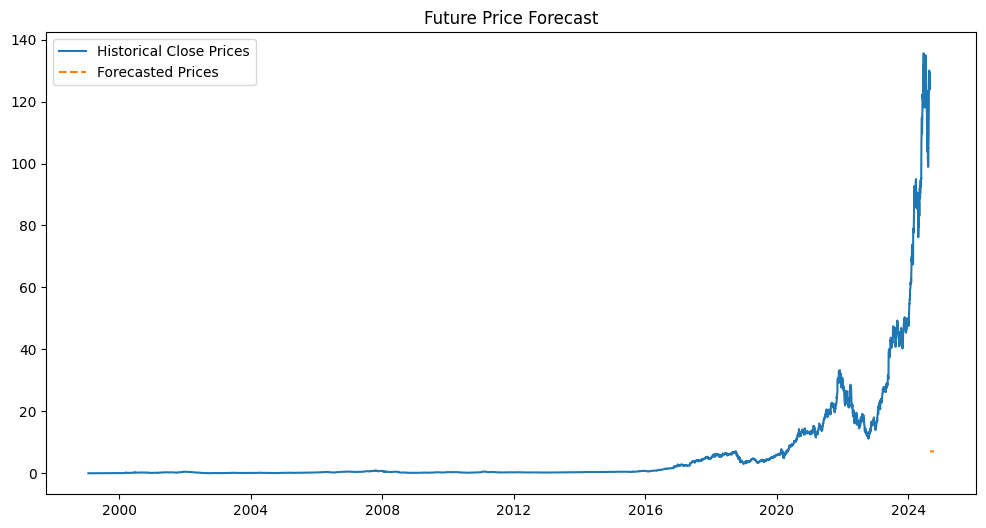

In [28]:
# Example for extending predictions (simplified approach)
future_dates = pd.date_range(start=df.index[-1] + pd.Timedelta(days=1), periods=30, freq='B')  # Business days
future_df = pd.DataFrame(index=future_dates)

# Assuming you have the model and data preprocessed for predictions
future_predictions = rf_model.predict(X_test_imputed[-30:])  # Predict future
future_df['Predicted_Close'] = future_predictions

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Historical Close Prices')
plt.plot(future_df.index, future_df['Predicted_Close'], label='Forecasted Prices', linestyle='--')
plt.title('Future Price Forecast')
plt.legend()
plt.show()
